In [1]:
# imports MatLab packages
import numpy as np
import matplotlib.pyplot as plt

# imports Gaussian Processes package
import GPy

# imports randomization package
import random

# imports math package
import math

# imports mean squared error
from sklearn.metrics import mean_squared_error

# imports time
import time

In [2]:
# defintion of plotting utility to plot a GP fit with 95% confidence interval

def plot_gp(X, m, C, training_points = None):
    
    # plot 95% confidence interval 
    plt.fill_between(X[:, 0],
                     m[:, 0] - 1.96 * np.sqrt(np.diag(C)),
                     m[:, 0] + 1.96 * np.sqrt(np.diag(C)),
                     alpha = 0.5)
    
    # plot GP mean and initial training points
    plt.plot(X, m, "-")
    plt.legend(labels = ["GP fit"])
    
    plt.xlabel("x"), plt.ylabel("f")
    
    # plot training points if included
    if training_points is not None:
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.legend(labels = ["GP fit", "sample points"])

In [3]:
one = np.array([[0.11, 1.7373], [0.12, 2.1814], [0.13, 2.5915], [0.14, 2.9677], [0.15, 3.3101], [0.16, 4.9051], [0.17, 5.5143], [0.18, 5.9784], [0.19, 6.3116]])

two = np.array([[0.20, 6.0388], [0.21, 6.2901], [0.22, 6.3270], [0.23, 5.9840], [0.24, 5.6118], [0.25, 5.9224], [0.26, 6.2088], [0.27, 6.7899], [0.28, 7.4516], [0.29, 7.3193]])

three = np.array([[0.30, 7.2167], [0.31, 7.1443], [0.32, 7.4225], [0.33, 7.6372], [0.34, 7.3834], [0.35, 7.0702], [0.36, 6.6528], [0.37, 5.9724], [0.38, 5.0013], [0.39, 4.0301]])

four = np.array([[0.40, 3.0590], [0.41, 2.7389], [0.42, 2.4246], [0.43, 1.9940], [0.44, 1.5635], [0.45, 0.91504], [0.46, 0.82668], [0.47, 0.52235], [0.48, 0.25767], [0.49, 0.032639]])

In [4]:
data = np.concatenate((one, two, three, four)) # data set

In [5]:
data_x = data[:, 0][:, None] # x-axis of data set
data_y = data[:, 1][:, None] # y-axis of data set

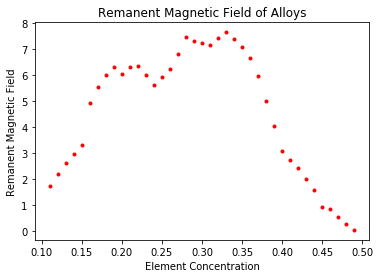

In [6]:
# plots data set

plt.title("Remanent Magnetic Field of Alloys")
plt.xlabel("Element Concentration")
plt.ylabel("Remanent Magnetic Field")
plt.plot(data_x, data_y, 'r.')
plt.show()

In [7]:
# creates GP kernel
# optimizes GP regression

k = GPy.kern.RBF(1)
m = GPy.models.GPRegression(data_x, data_y, k)
m.optimize()

In [8]:
# establishes mean, covariance, variance of plot

mean, Cov = m.predict(data_x, full_cov = True)
mean, variance = m.predict(data_x)

GP_regression.,value,constraints,priors
rbf.variance,12.60840585646674,+ve,
rbf.lengthscale,0.047820115727512304,+ve,
Gaussian_noise.variance,0.04494484144983562,+ve,


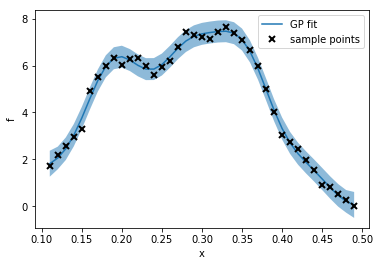

In [9]:
# prints mean, covariance
# prints GP regression plot

plot_gp(data_x, mean, Cov, training_points = (data_x, data_y))
m

In [10]:
# performs GP regression algorithm

def GP_regression(measured_samples, total_samples, unmeasured_samples):
    
    # creates GP kernel
    # optimizes GP regression
    k2 = GPy.kern.RBF(1)
    m2 = GPy.models.GPRegression(measured_samples[:, 0][:, None], measured_samples[:, 1][:, None], k2)
    m2.optimize()

    # establishes mean, covariance, variance of plot
    mean, covariance = m2.predict(total_samples[:, 0][:, None], full_cov = True)
    mean, variance = m2.predict(total_samples[:, 0][:, None])
    mean_unmeasured, variance_unmeasured = m2.predict(unmeasured_samples[:, 0][:, None])
    mean_measured, variance_measured = m2.predict(measured_samples[:, 0][:, None])

    # print mean, covariance
    # print GP regression plot
    # plot_gp(total_samples[:,0][:,None], mean, covariance, training_points = (measured_samples[:,0], measured_samples[:,1]))
    # plt.show()
    return m2, mean_unmeasured, variance_unmeasured, mean # GP regression information

In [11]:
var_lambda = 0.1

In [12]:
# grabs index of maximum upper confidence bound for unmeasured_samples

def get_upper_confidence_index(mean_unmeasured, variance_unmeasured, iteration):
    beta = 2 * math.log(len(total_samples) * math.pow(iteration, 2) * math.pow(math.pi, 2) / (6 * var_lambda))
    alpha = mean_unmeasured + math.sqrt(beta) * variance_unmeasured
    
    return alpha.argmax() # integer index

In [13]:
# calculates minimum regret

def get_min_regret(max_samples, measured_samples):
    return max_samples - measured_samples.max() # float

In [14]:
# calculates mean squared error

def get_mean_squared_error(predicted_values, measured_values):
    mean_values = np.mean(np.square(np.subtract(predicted_values, measured_values)))
    return math.sqrt(mean_values) # float

In [15]:
# plots mininmum regret

def plot_min_regret(iteration, min_regret):
    plt.title("Minimum Regret")
    plt.xlabel("Iteration")
    plt.ylabel("Minimum Regret")
    plt.plot(iteration, min_regret)
    plt.show()

In [16]:
# plots mean squared error

def plot_mean_squared_error(iteration, mean_squared_error):
    plt.title("Mean Squared Error")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.plot(iteration, mean_squared_error)
    plt.show()

In [17]:
# sampling from the GP

k = GPy.kern.RBF(input_dim = 1, lengthscale = 0.2)

X = np.linspace(0., 1., 500) # 500 points evenly spread over [0, 1]
X = X[:, None] # reshape X to make it n * p

mu = np.zeros((500)) # vector of the means
C = k.K(X, X) # covariance matrix associated with inputs X

# generate 20 separate samples from a Gaussian with mean mu and covariance C
Z = np.random.multivariate_normal(mu, C, 1)

In [23]:
row_iteration_counter = 0 # total rows of matrix

In [24]:
row_iteration_total = 10

columns_total = 39

In [25]:
min_regret_array_total = np.zeros(shape = (row_iteration_total, columns_total))

mean_squared_error_array_total = np.zeros(shape = (row_iteration_total, columns_total))

# CODE WORKS UP TO THIS POINT

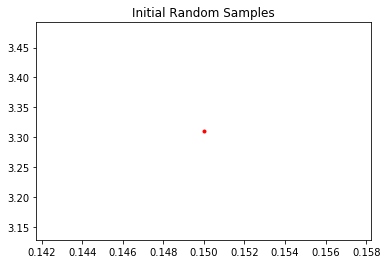

 C:\Users\ekelm\Anaconda3\lib\site-packages\GPy\kern\src\rbf.py:51: RuntimeWarning:overflow encountered in square


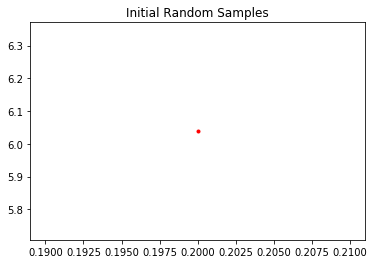

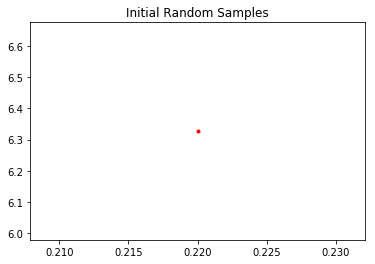

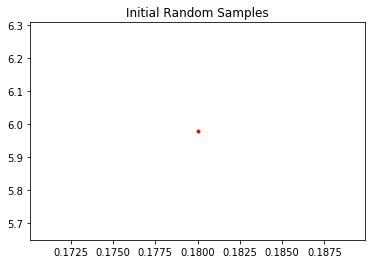

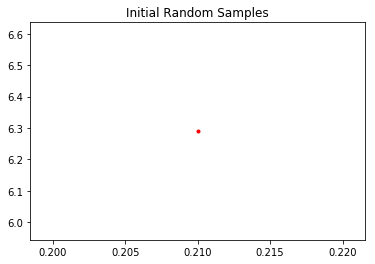

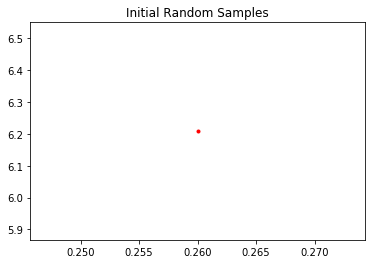

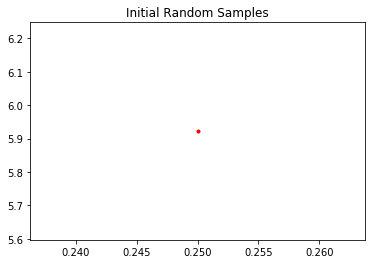

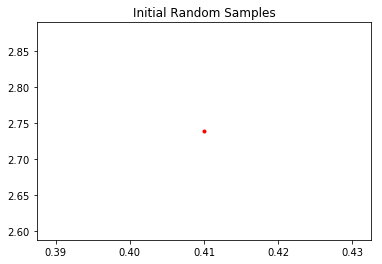

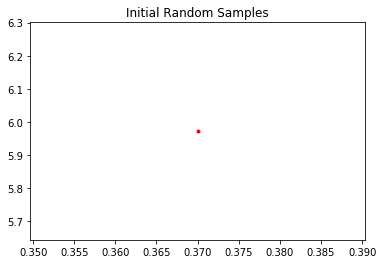

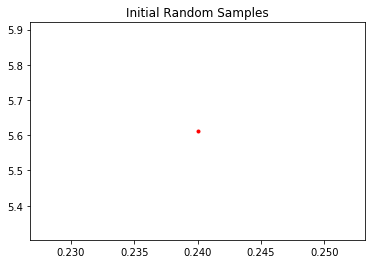

In [26]:
while row_iteration_counter < 10:

    # unmeasured_samples = x1
    measured_samples = [] # empty array

    # plot 10 random (prior) points

    # establish all samples to be measured
    
    total_samples = np.hstack((data_x, data_y))
    unmeasured_samples = total_samples;

    # take 10 random samples
    L = np.shape(data_x)[0]
    indices_to_keep = np.random.permutation(L)[0:1] # randomizes all samples
    measured_samples = unmeasured_samples[indices_to_keep, :]
    unmeasured_samples = np.delete(unmeasured_samples, indices_to_keep, 0)

    # builds plot
    plt.title("Initial Random Samples")
    plt.plot(measured_samples[:, 0], measured_samples[:, 1], 'r.')
    plt.show()

    iteration_counter_1 = 1 # initialized to 1 to account for logarithmic function

    iteration_counter_0_array = None # typical iteration counter

    min_regret_array = get_min_regret(total_samples[:, 1].max(), measured_samples[:, 1])

    m2, mean_unmeasured, variance_unmeasured, mean_total = GP_regression(measured_samples, total_samples, unmeasured_samples)
    mean_squared_error_array = get_mean_squared_error(mean_total, total_samples[:, 1][:, None])

    # performs GP regression for all elements in unmeasured_samples

    while unmeasured_samples.shape[0] > 0:

        # prints regression plot and measures of central tendency
        m2, mean_unmeasured, variance_unmeasured, mean_total = GP_regression(measured_samples, total_samples, unmeasured_samples)

        # gets new maximum upper confidence bound on every loop
        upper_confidence_index = get_upper_confidence_index(mean_unmeasured, variance_unmeasured, iteration_counter_1)
        upper_confidence_xy = np.array([unmeasured_samples[upper_confidence_index]]) # x- and y-values (two columns)

        # adds value with maximum upper confidence bound to measured_samples
        # deletes value with maximum upper confidence bound from unmeasured_samples
        measured_samples = np.concatenate((measured_samples, upper_confidence_xy))
        unmeasured_samples = np.delete(unmeasured_samples, upper_confidence_index, 0)

        # gets minimum regret
        min_regret = get_min_regret(total_samples[:, 1].max(), measured_samples[:, 1])
        min_regret_array = np.append(min_regret_array, min_regret) # array of all minimum regrets

        # gets mean squared error
        mean_squared_error = get_mean_squared_error(mean_total, total_samples[:, 1][:, None])
        mean_squared_error_array = np.append(mean_squared_error_array, mean_squared_error) # array of all mean squared errors
        
        iteration_counter_0_array = np.append(iteration_counter_0_array, iteration_counter_1) # tallies iterations
        iteration_counter_1 = iteration_counter_1 + 1
    
    min_regret_array_total[row_iteration_counter] = min_regret_array
    mean_squared_error_array_total[row_iteration_counter] = mean_squared_error_array
    
    row_iteration_counter = row_iteration_counter + 1

 C:\Users\ekelm\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:380: MatplotlibDeprecationWarning:
cycling among columns of inputs with non-matching shapes is deprecated.


Text(0.5, 1.0, 'Mean Squared Error')

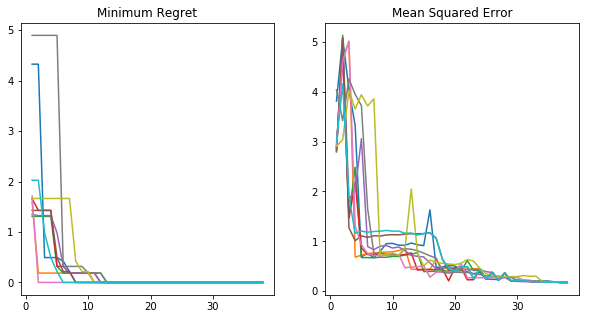

In [28]:
xx = np.tile(np.reshape(iteration_counter_0_array,(1,39)), (5,1))
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(xx.T ,min_regret_array_total.T)
plt.title('Minimum Regret')

plt.subplot(1,2,2)
plt.plot(xx.T,mean_squared_error_array_total.T)
plt.title('Mean Squared Error')